# **Revised Simplex Method**

**Note: All examples used in this notebook are based on the lecture examples **



###Revised Simplex Method Implementation

In [ ]:
import numpy as np
from scipy.optimize import linprog

In [ ]:
def Revised_semplex(c, A, RHS):

  #C: coefficiant matrix
  #A : constraint matrix >> shape : m,n
  #b : np.array : Right-hand side vector
  m, n = A.shape
  basic_var = np.arange(m)  # initialize basis
  non_basic = np.arange(m, n)  # non-basic var

  # feasible solution
  B_inverse = np.linalg.inv(A[:, basic_var])
  basic_sol = B_inverse @ RHS
  solution = np.zeros(n)
  solution[basic_var] = basic_sol  # solution >> basic variables

  iteration = 0

  while True:
      # Reduced Costs for nonbasic Vectors (Δj)
      basic_cost = c[basic_var]
      non_basic_cost = c[non_basic]
      Updated_rcost = non_basic_cost - (basic_cost.T @ B_inverse @ A[:, non_basic]) # reduced cost

      # optimality check
      if all(Updated_rcost <= 0):  # Stop if all reduced costs
          z_optimal = c @ solution
          #print(f"Optimal solution found in {iteration} iterations.")
          return solution, z_optimal, "Optimal_value"

      # find entering variable
      enter_index = np.argmax(Updated_rcost)
      enter_var = non_basic[enter_index]

      # Compute direction vector (Xk column vector)
      dir_vector = B_inverse @ A[:, enter_var]

      # using ratio test
      ratios = np.where(dir_vector > 0, basic_sol / dir_vector, np.inf)
      leav_index = np.argmin(ratios)
      leav_var = basic_var[leav_index]

      # Update the basis
      non_basic[enter_index] = leav_var
      basic_var[leav_index] = enter_var

      # Recompute B_inverse
      B_inverse = np.linalg.inv(A[:, basic_var])
      basic_sol = B_inverse @ RHS
      solution[basic_var] = basic_sol  # Update solution > new basic var

      iteration +=1



###Solving examples using the implemented algorithm

#### 1- Regular Simplex

In [ ]:
cof = np.array([5, 4, 0, 0, 0, 0 ])

A = np.array([
    [6, 4, 1, 0, 0, 0],
    [1, 2, 0, 1, 0, 0],
    [-1, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1]

])
RHS = np.array([24, 6, 1, 2])

solution, optimal_value, status = Revised_semplex(cof, A, RHS)

print("Solution:", solution)
print("Optimal Value:", optimal_value)
print("Status:", status)

Solution: [3.  1.5 4.  1.  2.5 0.5]
Optimal Value: 21.0
Status: Optimal_value


#### Built-In function - Regular

In [ ]:
cof = [-5,-4]
A = [[6, 4],[1, 2],[-1, 1],[0, 1]]

RHS = [24, 6, 1, 2]
x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method ='revised simplex' )
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -21.0
       x: [ 3.000e+00  1.500e+00]
     nit: 2


C:\Users\HP\AppData\Local\Temp\ipykernel_18724\2013906662.py:7: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method ='revised simplex' )


#### 2- phase-simplex

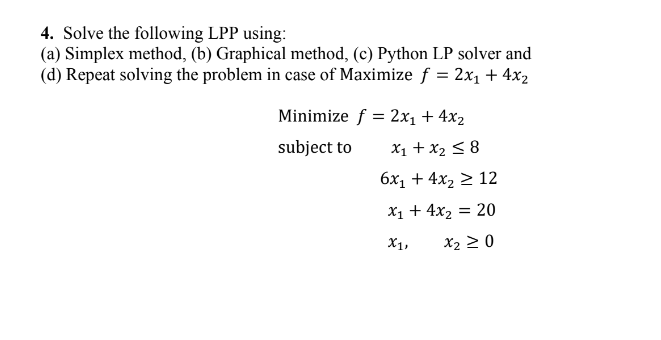

In [ ]:
cof = np.array([2, 4, 0, 0, 0, 0])
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [6, 4, 0, 1, 0, -1],
    [1, 4, 0, 0, 1, 0]
])
RHS = np.array([8, 12, 20])

solution, z_optimal, status = Revised_semplex(cof, A, RHS)

print("Optimal Solution:", solution)
print("Optimal Value:", z_optimal)
print("Status:", status)

Optimal Solution: [ 4.   4.   4.2  0.   0.  28. ]
Optimal Value: 24.0
Status: Optimal_value


Built-In function 2- phase-simplex

In [ ]:
cof = [-2,-4]
A = [[1, 1],[-6, -4],[1, 4]]

RHS = [8, 12, 20]
x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(cof, A_ub=A, b_ub=RHS, bounds=[x0_bounds, x1_bounds],method='revised simplex')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -24.0
       x: [ 4.000e+00  4.000e+00]
     nit: 2


C:\Users\HP\AppData\Local\Temp\ipykernel_18724\1875869733.py:7: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(cof, A_ub=A, b_ub=RHS, bounds=[x0_bounds, x1_bounds],method='revised simplex')


### The 4 - Special Cases

#### 1- Degeneracy

In [ ]:
cof = np.array([3, 9, 0, 0])
A = np.array([
    [1, 4, 1, 0],
    [1, 2, 0, 1]])
RHS = np.array([8, 4])


solution, optimal_value, status = Revised_semplex(cof, A, RHS)

# Print the results
print("Solution", solution)
print("Optimal Value", optimal_value)
print("Status", status)

Solution [0. 2. 0. 0.]
Optimal Value 18.0
Status Optimal_value


#### Built-In function - Degeneracy

In [ ]:
cof = [-3, -9]
A = [[1, 4],[1, 2]]

RHS = [8, 4]
x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -18.0
       x: [ 0.000e+00  2.000e+00]
     nit: 2


C:\Users\HP\AppData\Local\Temp\ipykernel_18724\1109263034.py:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )


####2- Alternative optima

In [ ]:
def Revised_semplex2(c, A, RHS):

  #C: coefficiant matrix
  #A : constraint matrix >> shape : m,n
  #b : np.array : Right-hand side vector
  m, n = A.shape
  basic_var = np.arange(m)  # initialize basis
  non_basic = np.arange(m, n)  # non-basic var

  # feasible solution
  B_inverse = np.linalg.inv(A[:, basic_var])
  basic_sol = B_inverse @ RHS
  solution = np.zeros(n)
  solution[basic_var] = basic_sol  # solution with basic variables

  iteration = 0

  while True:
      # Compute Reduced Costs for nonbasic Vectors (Δj)
      basic_cost = c[basic_var]
      non_basic_cost = c[non_basic]
      Updated_rcost = non_basic_cost - (basic_cost.T @ B_inverse @ A[:, non_basic]) # reduced cost

      # optimality check
      if all(Updated_rcost <= 0):  # Stop if all reduced costs
          z_optimal = c @ solution
          #print(f"Optimal solution found in {iteration} iterations.")
          if any(Updated_rcost == 0):  # If any reduced cost is zero, alternative optima exist
                print("Alternative optimal solutions exist.")
          else:
                print("Unique optimal solution.")


          return solution, z_optimal, "Optimal_value"

      # find entering variable
      enter_index = np.argmax(Updated_rcost)
      enter_var = non_basic[enter_index]

      # Compute direction vector (Xk column vector)
      dir_vector = B_inverse @ A[:, enter_var]

      # using ratio test
      ratios = np.where(dir_vector > 0, basic_sol / dir_vector, np.inf)
      leav_index = np.argmin(ratios)
      leav_var = basic_var[leav_index]

      # Update the basis
      non_basic[enter_index] = leav_var
      basic_var[leav_index] = enter_var

      # Recompute B_inverse
      B_inverse = np.linalg.inv(A[:, basic_var])
      basic_sol = B_inverse @ RHS
      solution[basic_var] = basic_sol  # Update solution > new basic var

      iteration +=1

In [ ]:
cof = np.array([2, 4, 0, 0])
A = np.array([[1, 2, 1, 0],
              [1, 1, 0, 1]])
RHS = np.array([5, 4])


solution, optimal_value, status = Revised_semplex2(cof, A, RHS)

# Print the results
print("Solution", solution)
print("Optimal Value", optimal_value)
print("Status", status)

Alternative optimal solutions exist.
Solution [3. 1. 0. 0.]
Optimal Value 10.0
Status Optimal_value


####  Built-In function -Alternative optima

In [ ]:
cof = [-2, -4]
A = [[1, 2],[1, 1]]
RHS = [5, 4]
x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(c = cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -10.0
       x: [ 0.000e+00  2.500e+00]
     nit: 1


C:\Users\HP\AppData\Local\Temp\ipykernel_18724\596086014.py:7: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c = cof, A_ub=A, b_ub=RHS, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )


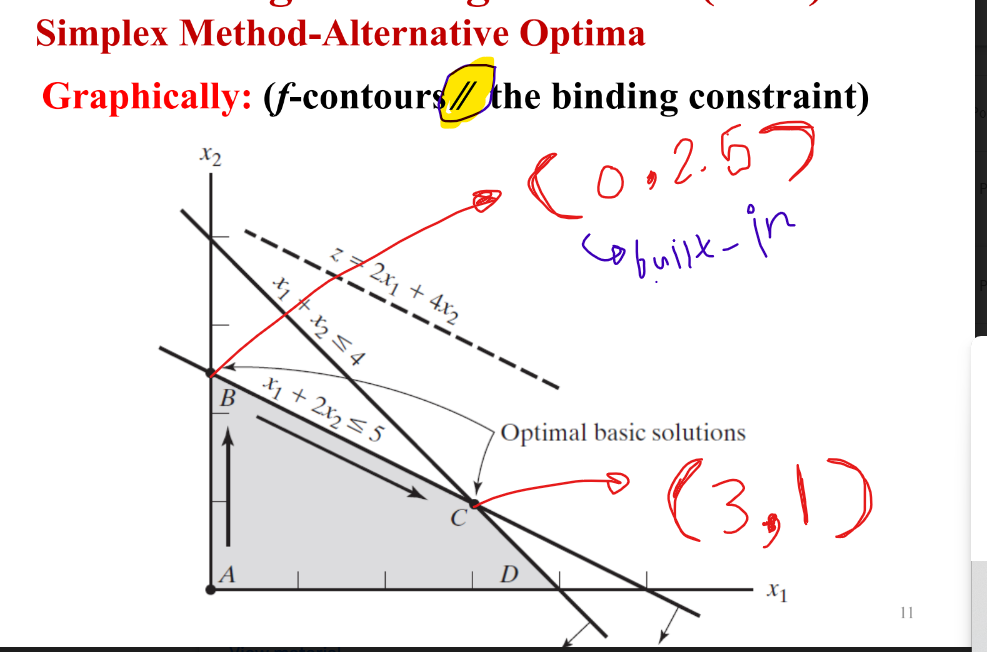

#### 3-Unbounded Solution

In [ ]:
def Revised_semplex3(c, A, RHS):

  #c: coefficiant matrix
  #A : constraint matrix >> shape : m,n
  #b : np.array : Right-hand side vector
  m, n = A.shape
  basic_var = np.arange(m)  # initialize basis
  non_basic = np.arange(m, n)  # non-basic var

  # feasible solution
  B_inverse = np.linalg.inv(A[:, basic_var])
  basic_sol = B_inverse @ RHS
  solution = np.zeros(n)
  solution[basic_var] = basic_sol  # solution with basic variables

  iteration = 0

  while True:
      # compute Reduced costs for nonbasic Vectors (Δj)
      basic_cost = c[basic_var]
      non_basic_cost = c[non_basic]
      Updated_rcost = non_basic_cost - (basic_cost.T @ B_inverse @ A[:, non_basic]) # reduced cost

      # optimality check
      if all(Updated_rcost <= 0):  # Stop if all reduced costs
          z_optimal = c @ solution
          print(f"Optimal solution found in {iteration} iterations.")
          return solution, z_optimal, "Optimal_value"

      # find entering variable
      enter_index = np.argmax(Updated_rcost)
      enter_var = non_basic[enter_index]

      # compute direction vector (Xk column vector)
      dir_vector = B_inverse @ A[:, enter_var]

      if all(dir_vector <= 0):
          z_optimal = c @ solution
          print("The solution is unbounded.")    ## the unbounded solution condition
          return solution, z_optimal, "Unbounded"

      # using ratio test
      ratios = basic_sol / dir_vector
      ratios[ratios <= 0] = np.inf  # ignore non-positive ratios
      leav_index = np.argmin(ratios)
      leav_var = basic_var[leav_index]

      # Update the basis
      non_basic[enter_index] = leav_var
      basic_var[leav_index] = enter_var

      # Recompute B_inverse
      B_inverse = np.linalg.inv(A[:, basic_var])
      basic_sol = B_inverse @ RHS
      solution[basic_var] = basic_sol  # Update solution > new basic var

      iteration +=1



In [ ]:
obj = np.array([2, 1, 0, 0])

lhs = np.array([
    [1, -1, 1, 0],
    [2, 0, 0, 1]
])
rhs = np.array([10, 40])

solution, optimal_value, status = Revised_semplex3(obj, lhs, rhs)

# Print the results
print("Solution:", solution)
print("Optimal Value:", optimal_value)
print("Status:", status)

The solution is unbounded.
Solution: [20. 10.  0.  0.]
Optimal Value: 50.0
Status: Unbounded


####  Built-In function-Unbounded

In [ ]:
obj = np.array([-2, -1])
lhs_ineq = np.array([
    [1, -1],
    [2, 0]
])
rhs_ineq = np.array([10, 40])

x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )
print(result)

 message: The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.
 success: False
  status: 3
     fun: -50.0
       x: [ 2.000e+01  1.000e+01]
     nit: 2


C:\Users\HP\AppData\Local\Temp\ipykernel_18724\1599059805.py:10: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )


####4-Infeasible Solution

In [ ]:

def Revised_simplex4(c, A, RHS):

    m, n = A.shape
    # Phase 1: add artificial variables
    A_augmented = np.hstack([A, np.eye(m)])  # concatenate A with identity matrix
    c_augmented = np.concatenate([np.zeros(n), np.ones(m)])

    basic_var = np.arange(n, n + m)  # basic variables
    non_basic = np.arange(n)  # non-basic variables

    B_inverse = np.linalg.inv(A_augmented[:, basic_var])  # Inverse of basic matrix
    basic_sol = B_inverse @ RHS
    solution = np.zeros(n + m)
    solution[basic_var] = basic_sol  # initial basic solution values in the solution vector

    # minimize sum of artificial variables
    while True:
        # Reduced Costs for Non-basic Variables
        basic_cost = c_augmented[basic_var]
        non_basic_cost = c_augmented[non_basic]
        Updated_rcost = non_basic_cost - (basic_cost.T @ B_inverse @ A_augmented[:, non_basic])

        # Optimality check
        if all(Updated_rcost <= 0):
            # if artificial variables are zero then phase 1 is done indicating initial feasible point
            if np.any(solution[n:] > 0):  # If any artificial variable is non-zero then The problem is infeasible
                print("The problem is infeasible.")
                return None, None, "Infeasible"
            else:
                # Feasible solution found; proceed to Phase II
                break



In [ ]:
c = np.array([3, 2, 0, 0 ])

A = np.array([
    [2, 1, 1, 0],
    [3, 4, 0, 1]
])
b = np.array([2, 12])

solution, optimal_value, status = Revised_simplex4(c, A, b)

# Print the results
print("Solution:", solution)
print("Optimal Value:", optimal_value)
print("Status:", status)

The problem is infeasible.
Solution: None
Optimal Value: None
Status: Infeasible


####  Built-In function-Indeasible

In [ ]:
obj = np.array([-3, -2])
lhs_ineq = np.array([
    [2, 1],
    [-3, -4]
])
rhs_ineq = np.array([2, -12])
x0_bounds = (0, None)
x1_bounds = (0, None)
result = linprog(obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )
print(result)

C:\Users\HP\AppData\Local\Temp\ipykernel_18724\2286135431.py:9: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=(x0_bounds,x1_bounds),method = 'revised simplex' )


 message: The problem appears infeasible, as the phase one auxiliary problem terminated successfully with a residual of 4.0e+00, greater than the tolerance 1e-12 required for the solution to be considered feasible. Consider increasing the tolerance to be greater than 4.0e+00. If this tolerance is unnaceptably large, the problem is likely infeasible.
 success: False
  status: 2
     fun: -4.0
       x: [ 0.000e+00  2.000e+00]
     nit: 1
